# Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

# Import necessary Python Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loadindg the data set
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
#print first 5 rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Data Summary
df.shape

(614, 13)

In [4]:
# There are 614 rows and 13 columns present in our dataset

In [5]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#There are null values in Credit_History (50) , Self_Employed (32) ,LoanAmount (22) ,Dependents (15), Loan_Amount_Term (14) , Gender (13) & Married (3)
#The features which have null value for all the rows shall be dropped
#let us first describe the entire list of features and their details
#we shall treat null values once we evaluate the value counts of each feature.

In [7]:
#find duplicates
df.duplicated().sum()

0

In [8]:
# There are no duplicates present in our dataset

In [9]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Property_Area         object
Loan_Status           object
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
ApplicantIncome        int64
dtype: object

In [10]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Loan_ID 

LP001630    1
LP002100    1
LP002556    1
LP002990    1
LP001926    1
           ..
LP002367    1
LP001884    1
LP001778    1
LP001922    1
LP001657    1
Name: Loan_ID, Length: 614, dtype: int64
*******************************************************
*******************************************************
Value counts of Gender 

Male      489
Female    112
Name: Gender, dtype: int64
*******************************************************
*******************************************************
Value counts of Married 

Yes    398
No     213
Name: Married, dtype: int64
*******************************************************
*******************************************************
Value counts of Dependents 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
*******************************************************
*******************************************************
Value counts of Edu

<AxesSubplot:ylabel='Education'>

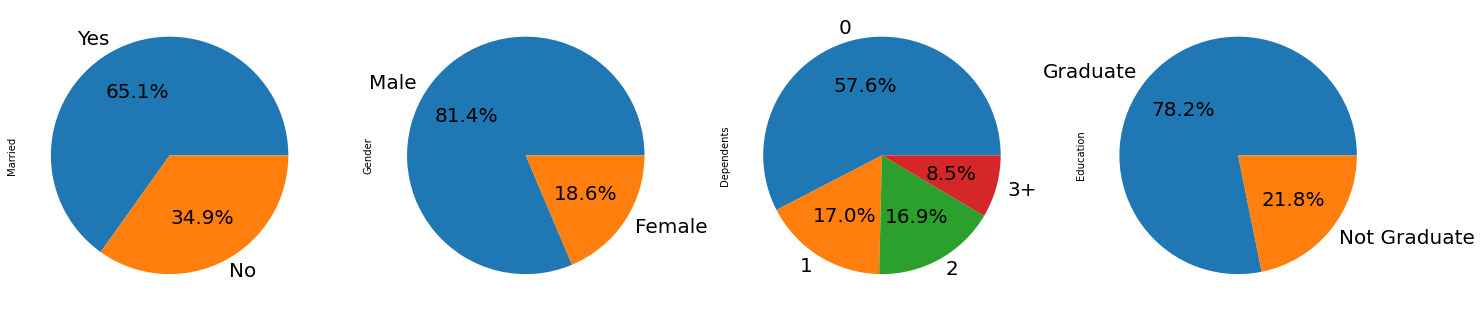

In [11]:
plt.figure(figsize=(50,25))
plt.subplot(1,8,1)
df['Married'].value_counts().plot.pie(fontsize=20,autopct='%1.1f%%')
plt.subplot(1,8,2)
df['Gender'].value_counts().plot.pie(fontsize=20,autopct='%1.1f%%')
plt.subplot(1,8,3)
df['Dependents'].value_counts().plot.pie(fontsize=20,autopct='%1.1f%%')
plt.subplot(1,8,4)
df['Education'].value_counts().plot.pie(fontsize=20,autopct='%1.1f%%')

<AxesSubplot:ylabel='Loan_Status'>

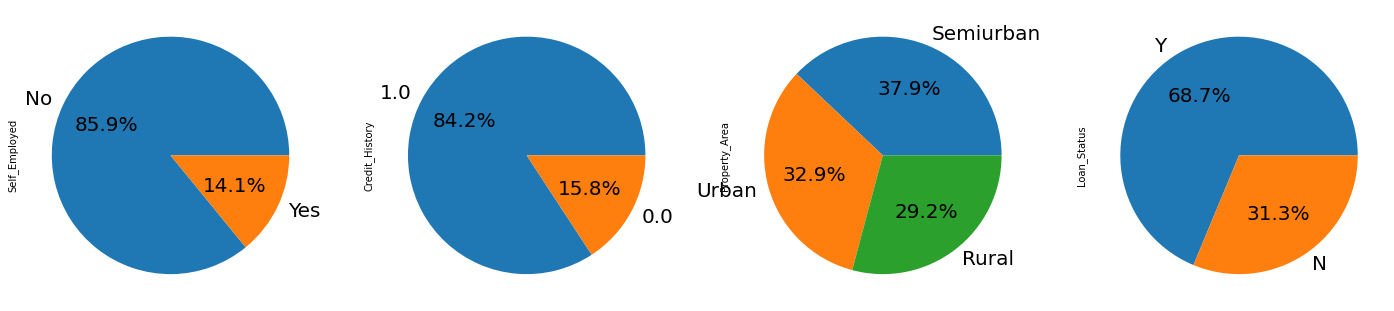

In [12]:
plt.figure(figsize=(50,25))
plt.subplot(1,8,5)
df['Self_Employed'].value_counts().plot.pie(fontsize=20, autopct='%1.1f%%')
plt.subplot(1,8,6)
df['Credit_History'].value_counts().plot.pie(fontsize=20, autopct='%1.1f%%')
plt.subplot(1,8,7)
df['Property_Area'].value_counts().plot.pie(fontsize=20, autopct='%1.1f%%')
plt.subplot(1,8,8)
df['Loan_Status'].value_counts().plot.pie(fontsize=20, autopct='%1.1f%%')

# Dropping Unnecessary Columns

1) Loan_ID (OBJECT DATATYPE) This is just an indicitor indicating the ID of the application, Hence, we shall drop this feature


In [13]:
df=df.drop(columns = ['Loan_ID'])

In [14]:
df = df.reset_index()
df = df.drop(columns = 'index')

In [15]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# ENCODING

In [16]:
#For Dependents feature too we will encode it, as for 0-2 & 3+ values it will encode it to 0-3 itself.

In [17]:
from sklearn.preprocessing import LabelEncoder
for col_name in df.columns:
    series = df[col_name]
    label_encoder = LabelEncoder()
    df[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )

In [18]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

Gender               float64
Married              float64
Dependents           float64
Self_Employed        float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
ApplicantIncome        int64
CoapplicantIncome      int64
Education              int32
Property_Area          int32
Loan_Status            int32
dtype: object

In [19]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Gender 

1.0    489
0.0    112
Name: Gender, dtype: int64
*******************************************************
*******************************************************
Value counts of Married 

1.0    398
0.0    213
Name: Married, dtype: int64
*******************************************************
*******************************************************
Value counts of Dependents 

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
*******************************************************
*******************************************************
Value counts of Education 

0    480
1    134
Name: Education, dtype: int64
*******************************************************
*******************************************************
Value counts of Self_Employed 

0.0    500
1.0     82
Name: Self_Employed, dtype: int64
*******************************************************
**********************

In [20]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
cont_data = ['LoanAmount']
cat_data = ['Dependents', 'Gender', 'Married', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

In [22]:
#imputing continous data
#KNN IMPUTER
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)
for i in cont_data:
    df[i] = pd.DataFrame(knnimp.fit_transform(df[[i]]))

In [23]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#imputing categorical data
#Simple Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NaN, strategy='most_frequent')
for i in cat_data:    
    df[i] = imputer.fit_transform(df[i].values.reshape(-1,1))[:,0] 

In [25]:
df['Married'].value_counts()

1.0    401
0.0    213
Name: Married, dtype: int64

In [26]:
df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
#lets check the statistical description of dataset
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,247.117264,78.884365,86.908784,7.667752,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,143.537853,92.623999,45.218431,1.109224,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,120.250000,0.000000,53.250000,8.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,244.500000,33.500000,82.000000,8.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,369.750000,153.750000,115.750000,8.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,504.000000,286.000000,202.000000,9.000000,1.000000,2.000000,1.000000


In [31]:
#all the features do not contain any null value. 
# as per the thumb rule mean>std, CoapplicantIncome fail in this; Hence, there is skewness.

1    422
0    192
Name: Loan_Status, dtype: int64


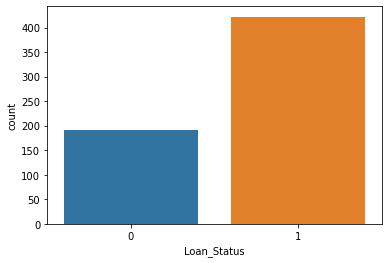

In [32]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="Loan_Status", data=df)
print(df['Loan_Status'].value_counts())

In [33]:
#There is a problem of class imbalance here and hence we would have to either do upsampling or downsampling depending on the size of the dataset.

#Since the amount of upsampling needed would be around '3 times' we would be better doing downsampling to avoid any foreign data or unwanted data.

# We will peform downsampling at a later stage

<AxesSubplot:>

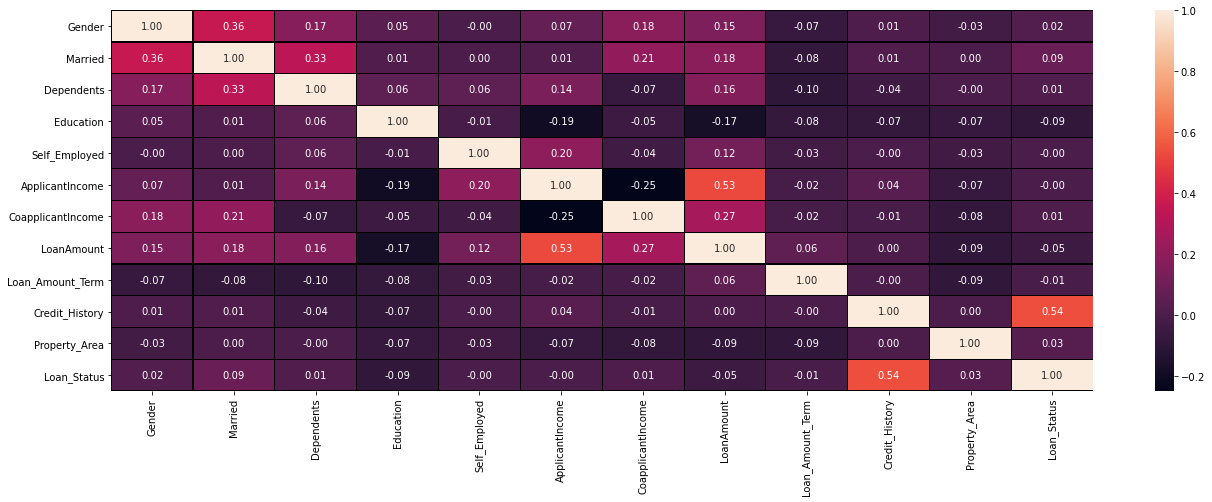

In [34]:
#Correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [35]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
LoanAmount           0.045449
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
CoapplicantIncome    0.007812
Loan_Amount_Term     0.005679
Self_Employed        0.003700
ApplicantIncome      0.003123
Name: Loan_Status, dtype: float64

In [36]:
#As per the above details, there is no feature which has high correlation with the target column.
#Also, there is no major correlaton among the features 

# DIVIDE DATA INTO FEATURES & LABEL

In [38]:
#diving the columns into feature and label
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# DATA VISUALIZATION

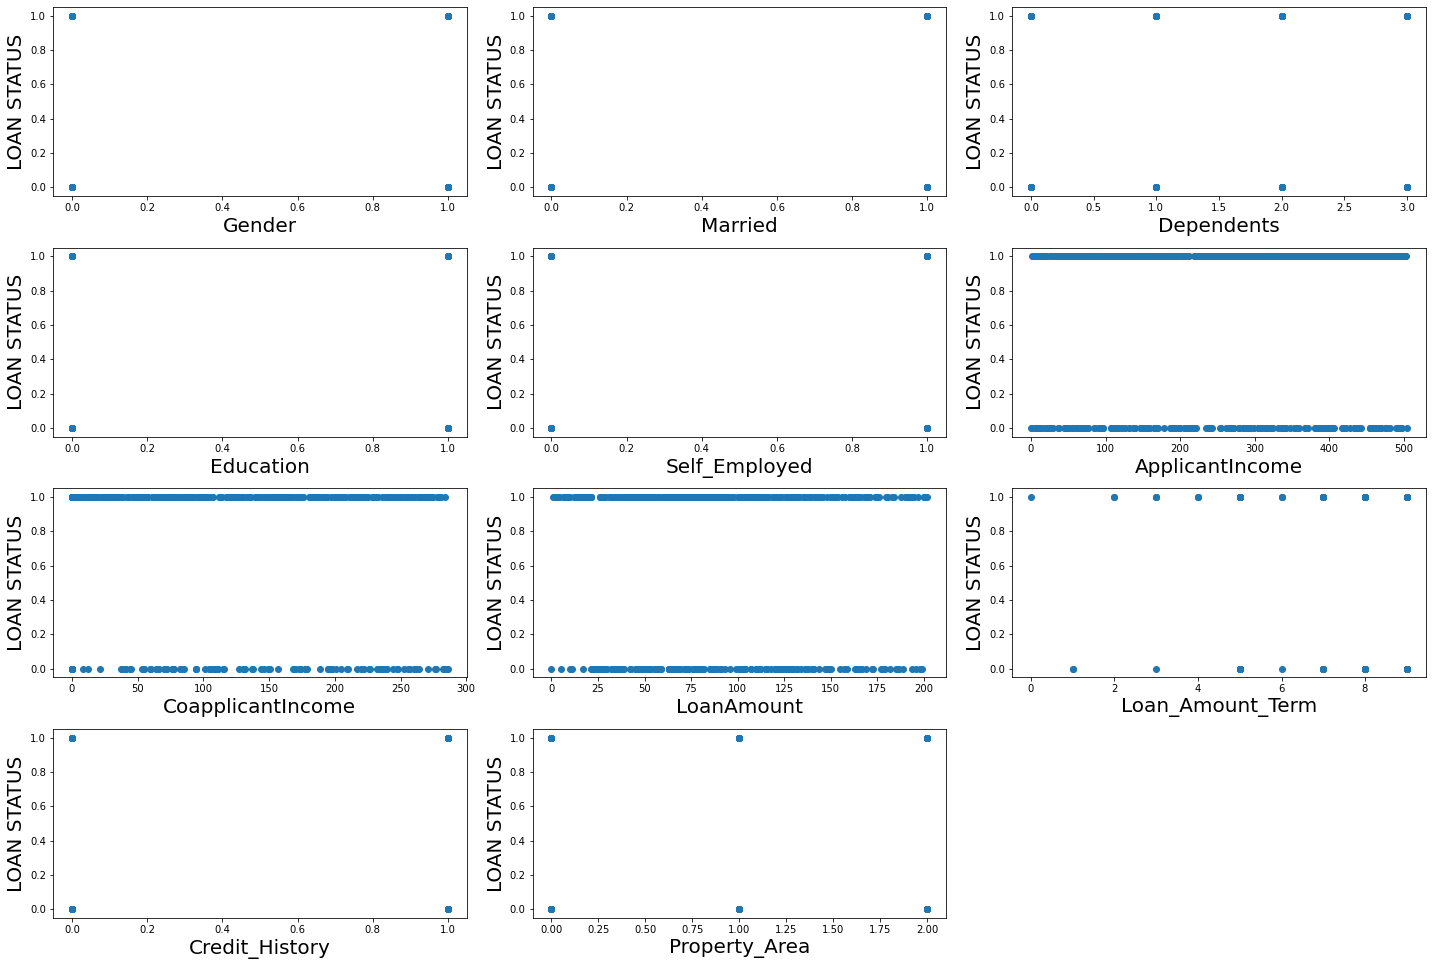

In [39]:
#Visualizing relationship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('LOAN STATUS', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [40]:
#All the features are equally related to both the classes.

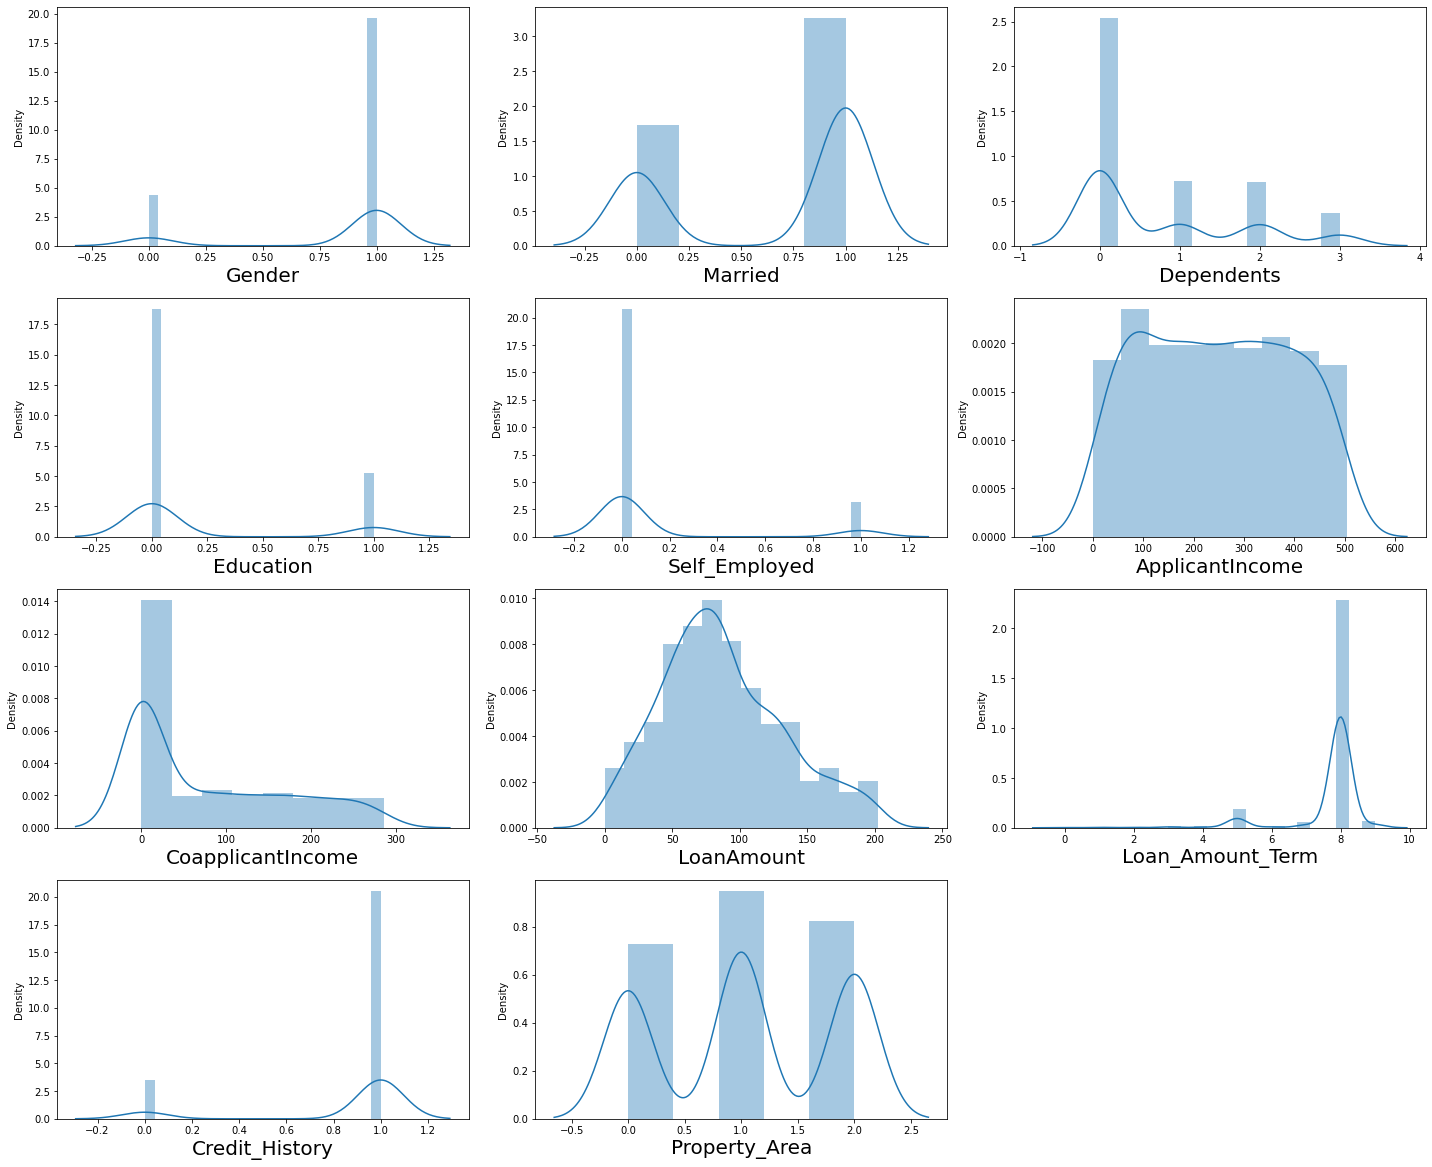

In [41]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [42]:
#CoapplicantIncome is right skewed.
#ApplicantIncome is skewed

In [43]:
#Checking skewness of the features
X.skew().sort_values(ascending=False)

Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
CoapplicantIncome    0.780870
LoanAmount           0.487758
ApplicantIncome      0.040993
Property_Area       -0.066196
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
Loan_Amount_Term    -3.316702
dtype: float64

In [44]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
X_new = power_transform(X)
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False) #validating that the skewness is removed

Self_Employed        2.159796
Education            1.367622
Dependents           0.441404
CoapplicantIncome   -0.039267
LoanAmount          -0.047073
Loan_Amount_Term    -0.101736
Property_Area       -0.158267
ApplicantIncome     -0.262193
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
dtype: float64

In [45]:
#Education & Self_Employed are both categorical columns and hence their skewness is not a real threat to our prediction

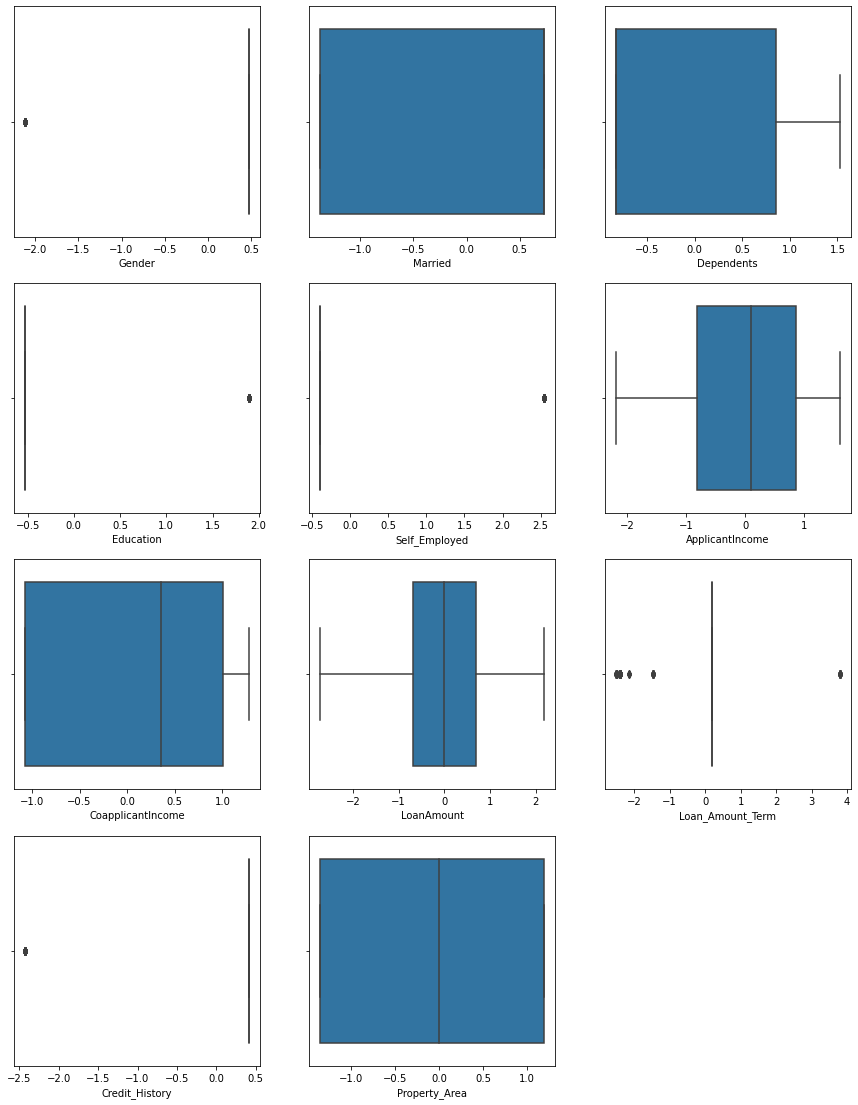

In [46]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in X:
    if graph<=30: 
        ax=plt.subplot(10,3,graph)
        sns.boxplot(X[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [47]:
# to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(X))
z.shape

threshold=3
print(np.where(z>3))

X_new=X[(z<3).all(axis=1)]
print("total_dropped_rows",X.shape[0]-X_new.shape[0])

y=y[(z<3).all(axis=1)]
y.shape

(array([ 75, 109, 130, 168, 179, 228, 248, 293, 298, 358, 366, 378, 500,
       516, 573], dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))
total_dropped_rows 15


(599,)

In [48]:
X = X_new
X.shape

(599, 11)

In [49]:
#Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [51]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.8833333333333333 on Random State 82


In [52]:
#CREATING TRAIN-TEST SPLIT
x_train_imb, x_test, y_train_imb, y_test =  train_test_split(X, y, test_size=0.20, random_state=82)

In [53]:
print(x_train_imb.shape)
print(y_train_imb.shape)
print(x_test.shape)
print(y_test.shape)

(479, 11)
(479,)
(120, 11)
(120,)


# USING SMOTE FOR DOWN-SAMPLING

1    422
0    192
Name: Loan_Status, dtype: int64


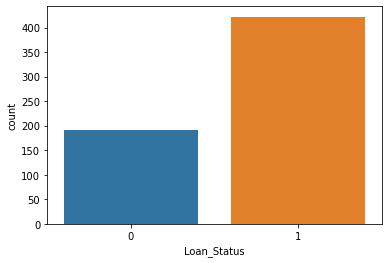

In [54]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="Loan_Status", data=df)
print(df['Loan_Status'].value_counts())

In [55]:
# We will be doing down sampling of the target column which has imblanced class

In [56]:
#USING SMOTE FOR DOWN-SAMPLING

In [57]:
print(y_train_imb.value_counts())

1    330
0    149
Name: Loan_Status, dtype: int64


In [58]:
#y_train has 149 entries of class 0 and only 330 entries of class 1

In [59]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler()
down_smp=RandomUnderSampler(0.99)
x_train_ns,y_train_ns=down_smp.fit_sample(x_train_imb,y_train_imb)
from collections import Counter
print('The no of samples before fit()', format(Counter(y_train_imb)))
print('The no of samples after fit()', format(Counter(y_train_ns)))

The no of samples before fit() Counter({1: 330, 0: 149})
The no of samples after fit() Counter({1: 150, 0: 149})


In [60]:
print(y_train_ns.value_counts())

1    150
0    149
Name: Loan_Status, dtype: int64


In [61]:
#Now both the classes have 150 and 149 entries and hence we have a balanced class in our training data.

In [62]:
# Using shallow copy or deep copy
import copy
x_train = copy.copy(x_train_ns)
y_train = copy.copy(y_train_ns)

In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(299, 11)
(299,)
(120, 11)
(120,)


# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL

In [64]:
results = pd.DataFrame()
model_name=[]
accuracy=[]
cvs=[]

In [65]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy_LR = accuracy_score(y_test,y_pred)*100
scr = cross_val_score(LR,X,y,cv=5)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
model_name.append("Logistic Regression")
accuracy.append(accuracy_LR)
cvs.append(scr.mean())

[[21 13]
 [ 9 77]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        34
           1       0.86      0.90      0.88        86

    accuracy                           0.82       120
   macro avg       0.78      0.76      0.77       120
weighted avg       0.81      0.82      0.81       120



In [66]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)*100
scr2 = cross_val_score(dt,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
model_name.append("Decistion Tree Classifier")
accuracy.append(accuracy_dt)
cvs.append(scr2.mean())

[[28  6]
 [41 45]]
              precision    recall  f1-score   support

           0       0.41      0.82      0.54        34
           1       0.88      0.52      0.66        86

    accuracy                           0.61       120
   macro avg       0.64      0.67      0.60       120
weighted avg       0.75      0.61      0.62       120



In [67]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)*100
scr3 = cross_val_score(rf,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
model_name.append("Random Forest Classifier")
accuracy.append(accuracy_rf)
cvs.append(scr3.mean())

[[26  8]
 [27 59]]
              precision    recall  f1-score   support

           0       0.49      0.76      0.60        34
           1       0.88      0.69      0.77        86

    accuracy                           0.71       120
   macro avg       0.69      0.73      0.68       120
weighted avg       0.77      0.71      0.72       120



In [68]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred_svc)*100
scr4 = cross_val_score(svc,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
model_name.append("SVC")
accuracy.append(accuracy_svc)
cvs.append(scr4.mean())

[[24 10]
 [10 76]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        34
           1       0.88      0.88      0.88        86

    accuracy                           0.83       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.83      0.83      0.83       120



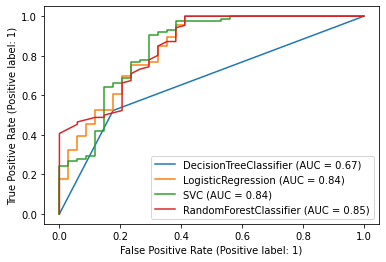

In [69]:
#PLOT THE ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()

In [70]:
results['Model Name'] = model_name
results['Accuracy'] = accuracy
results['Cross Value Score'] = cvs
results['ROC AUC'] = ['0.83', '0.70', '0.85', '0.81']
results

,Model Name,Accuracy,Cross Value Score,ROC AUC
0,Logistic Regression,81.666667,0.811359,0.83
1,Decistion Tree Classifier,60.833333,0.717759,0.70
2,Random Forest Classifier,70.833333,0.788011,0.85
3,SVC,83.333333,0.814720,0.81


In [71]:
#As per the results of the ROC AUC Curve, Random Forest Classifier is giving the best accuracy.

In [72]:
#Lets try to improve the accuracy score by using GridSearchCV over RF classifier

In [73]:
#Let's tune the parameter using GridSearchCV
#RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=41)
clf= RandomForestClassifier()
params = { 'n_estimators': [13,15],
          'criterion': ['entropy', 'gini'],
          'max_depth': [10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }
grid=GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_params=>', grid.best_params_)
clf=grid.best_estimator_
clf.fit(x_train,y_train)
y_pred_gscv=clf.predict(x_test)
rf_conf_mat=confusion_matrix(y_test,y_pred_gscv)
print('\n Conf Mat =>''\n', rf_conf_mat)
print('\n' ' Accuracy rf Normal =>', accuracy_score(y_test,y_pred_gscv))

report = classification_report(y_test,y_pred_gscv)
print(report)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}

 Conf Mat =>
 [[ 22  31]
 [  2 125]]

 Accuracy rf Normal => 0.8166666666666667
              precision    recall  f1-score   support

           0       0.92      0.42      0.57        53
           1       0.80      0.98      0.88       127

    accuracy                           0.82       180
   macro avg       0.86      0.70      0.73       180
weighted avg       0.84      0.82      0.79       180



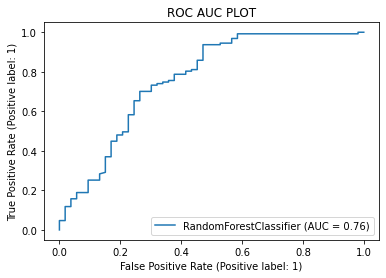

In [74]:
#ROC AUC PLOT
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,x_test,y_test)
plt.title("ROC AUC PLOT")
plt.show()

# Concluding Remarks

Since Random Forest Regression model has the best score, we will finalise the model.

# SAVE THE MODEL

In [75]:
import joblib
joblib.dump(clf,'Loan_Application_Status.obj')

['Loan_Application_Status.obj']